In [53]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [54]:
ILPD= pd.read_csv('ILPD.csv', names=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphatase', 
'Alanine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio',
'Selector']) 
ILPD


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Preprocessing

 Dropping the "Gender" column to only retain numerical values

In [55]:
data=ILPD.drop(['Gender'], axis=1)
data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [56]:
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Selector                      0
dtype: int64

In [57]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0)
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Selector                      0
dtype: int64

In [58]:
ILPD

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Creating labels

In [59]:
ILPD['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [60]:
ILPD['Gender'].replace(['Male','Female'],['0','1'],inplace=True)
ILPD['Gender'].value_counts()
ILPD

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Test-train split

[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1
 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2
 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1]


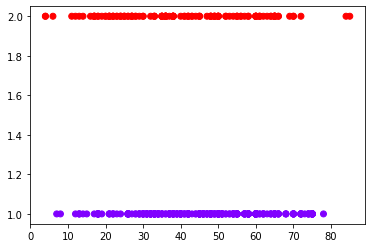

In [61]:
x_tr = data.iloc[0:460, :]
x_te = data.iloc[460: , :]

x_train=np.asarray(x_tr).astype('float32')
x_test=np.asarray(x_te).astype('float32')

x_trn = ILPD.iloc[0:460, :]#Using the modified dataset with '1' and '0' replacing gender values of female and male to create labels
x_tes = ILPD.iloc[460: , :]

#y_train=np.array(x_trn['Gender'])
#y_test=np.array(x_tes['Gender'])
y_train=np.array(x_trn['Selector'])
y_test=np.array(x_tes['Selector'])

print(y_train)
plt.scatter(x_train[:,0],y_train, c=y_train, cmap='rainbow')
plt.show()

In [62]:
LR=LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

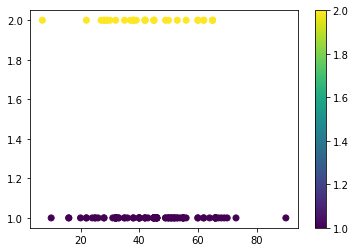

In [70]:
y_pred=LR.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,9],c=y_pred)
plt.colorbar()
plt.show()

# References

1. https://www.youtube.com/watch?v=VK6v9Ure8Lk
2. https://www.youtube.com/watch?v=HYcXgN9HaTM
3. https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models